# Directed Evolution - GB1
----
In this notebook we are going to examine the mutational effects on catalytic activity. We are going to start by importing the GB1 dataset and to do exploratory data analysis on the data. After the exploratory data analysis we are going to split the data into appropriate datasets for training, validation and testing. With these datasets we are building simple machine learning models.

In [16]:
import pandas as pd
import sys
sys.path.append('../')
from io_tools import fasta
import torch
from analysis import ML
from io_tools import fasta
from io_tools import embeddings
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from analysis import ML

data = pd.read_csv('../example_data/directed_evolution/GB1/GB1.csv')
data

,Sequence,Description,Ligand,Data,Units,Assay/Protocol
0,MAPTLSEQTRQLVRASVPALQKHSVAISATMCRLLFERYPETRSLC...,Y32C+F46C+L56I+V97Y,NaN,-0.271,%,SFC
1,MAPTLSEQTRQLVRASVPALQKHSVAISATMCRLLFERYPETRSLF...,Y32C+F46F+L56N+V97L,NaN,-0.894,%,SFC
2,MAPTLSEQTRQLVRASVPALQKHSVAISATMCRLLFERYPETRSLF...,Y32C+F46F+L56S+V97V,NaN,-0.453,%,SFC
3,MAPTLSEQTRQLVRASVPALQKHSVAISATMCRLLFERYPETRSLF...,Y32C+F46F+L56S+V97Y,NaN,-0.016,%,SFC
4,MAPTLSEQTRQLVRASVPALQKHSVAISATMCRLLFERYPETRSLG...,Y32C+F46G+L56F+V97I,NaN,0.066,%,SFC
...,...,...,...,...,...,...
561,MAPTLSEQTRQLVRASVPALQKHSVAISATMYRLLFERYPETRSLN...,Y32Y+F46N+L56L+V97L,NaN,-0.791,%,SFC
562,MAPTLSEQTRQLVRASVPALQKHSVAISATMYRLLFERYPETRSLN...,Y32Y+F46N+L56L+V97S,NaN,-0.066,%,SFC
563,MAPTLSEQTRQLVRASVPALQKHSVAISATMYRLLFERYPETRSLN...,Y32Y+F46N+L56L+V97Y,NaN,-0.148,%,SFC
564,MAPTLSEQTRQLVRASVPALQKHSVAISATMYRLLFERYPETRSLN...,Y32Y+F46N+L56S+V97Y,NaN,-0.398,%,SFC


## Adding one hot encodings and LLM sequence representations
---
Regular sequences as strings are hardly interesting for machine learning purposes. We need the sequences as vectors or matrices to do useful work with them. In the following we are both adding one hot encodings and sequence representations to the dataframe. The LLM sequence embeddings are generated with the pretrained model ESM-1v. You can create these embeddings yourself by running the "../embedd/embedd_esm.py" script on the "../example_data/directed_evolution/GB1/GB1.fasta" file.

In [17]:
# one hot encodings
ohe = [torch.from_numpy(fasta.one_hot_encoding(s).flatten()) for s in data.Sequence.to_list()]
data['ohe'] = ohe

# LLM embeddings
names = [name.replace('+', '_') for name in data['Description'].to_list()]
e_names = [name + '.pt' for name in names]
_, embeddings = embeddings.load(path='../example_data/directed_evolution/GB1/representations/', names=e_names)
data['embeddings'] = embeddings

data

,Sequence,Description,Ligand,Data,Units,Assay/Protocol,ohe,embeddings
0,MAPTLSEQTRQLVRASVPALQKHSVAISATMCRLLFERYPETRSLC...,Y32C+F46C+L56I+V97Y,NaN,-0.271,%,SFC,"[tensor(0., dtype=torch.float64), tensor(0., d...","[tensor(-0.2631), tensor(0.1376), tensor(-0.14..."
1,MAPTLSEQTRQLVRASVPALQKHSVAISATMCRLLFERYPETRSLF...,Y32C+F46F+L56N+V97L,NaN,-0.894,%,SFC,"[tensor(0., dtype=torch.float64), tensor(0., d...","[tensor(-0.2779), tensor(0.1405), tensor(-0.12..."
2,MAPTLSEQTRQLVRASVPALQKHSVAISATMCRLLFERYPETRSLF...,Y32C+F46F+L56S+V97V,NaN,-0.453,%,SFC,"[tensor(0., dtype=torch.float64), tensor(0., d...","[tensor(-0.2873), tensor(0.1401), tensor(-0.12..."
3,MAPTLSEQTRQLVRASVPALQKHSVAISATMCRLLFERYPETRSLF...,Y32C+F46F+L56S+V97Y,NaN,-0.016,%,SFC,"[tensor(0., dtype=torch.float64), tensor(0., d...","[tensor(-0.2807), tensor(0.1366), tensor(-0.12..."
4,MAPTLSEQTRQLVRASVPALQKHSVAISATMCRLLFERYPETRSLG...,Y32C+F46G+L56F+V97I,NaN,0.066,%,SFC,"[tensor(0., dtype=torch.float64), tensor(0., d...","[tensor(-0.2630), tensor(0.1344), tensor(-0.14..."
...,...,...,...,...,...,...,...,...
561,MAPTLSEQTRQLVRASVPALQKHSVAISATMYRLLFERYPETRSLN...,Y32Y+F46N+L56L+V97L,NaN,-0.791,%,SFC,"[tensor(0., dtype=torch.float64), tensor(0., d...","[tensor(-0.2712), tensor(0.1407), tensor(-0.15..."
562,MAPTLSEQTRQLVRASVPALQKHSVAISATMYRLLFERYPETRSLN...,Y32Y+F46N+L56L+V97S,NaN,-0.066,%,SFC,"[tensor(0., dtype=torch.float64), tensor(0., d...","[tensor(-0.2708), tensor(0.1364), tensor(-0.15..."
563,MAPTLSEQTRQLVRASVPALQKHSVAISATMYRLLFERYPETRSLN...,Y32Y+F46N+L56L+V97Y,NaN,-0.148,%,SFC,"[tensor(0., dtype=torch.float64), tensor(0., d...","[tensor(-0.2677), tensor(0.1355), tensor(-0.15..."
564,MAPTLSEQTRQLVRASVPALQKHSVAISATMYRLLFERYPETRSLN...,Y32Y+F46N+L56S+V97Y,NaN,-0.398,%,SFC,"[tensor(0., dtype=torch.float64), tensor(0., d...","[tensor(-0.2727), tensor(0.1410), tensor(-0.13..."


## Visualizing ohe and embeddings
----
Now that we have loaded in the ohe and embeddings we can visualize them using different methdos. First we are going to visualize them both side by side using t-SNE.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 566 samples in 0.001s...
[t-SNE] Computed neighbors for 566 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 566 / 566
[t-SNE] Mean sigma: 0.520121
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.057999
[t-SNE] KL divergence after 1000 iterations: 0.966674
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 566 samples in 0.000s...
[t-SNE] Computed neighbors for 566 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 566 / 566
[t-SNE] Mean sigma: 0.164263
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.993370
[t-SNE] KL divergence after 1000 iterations: 0.576016


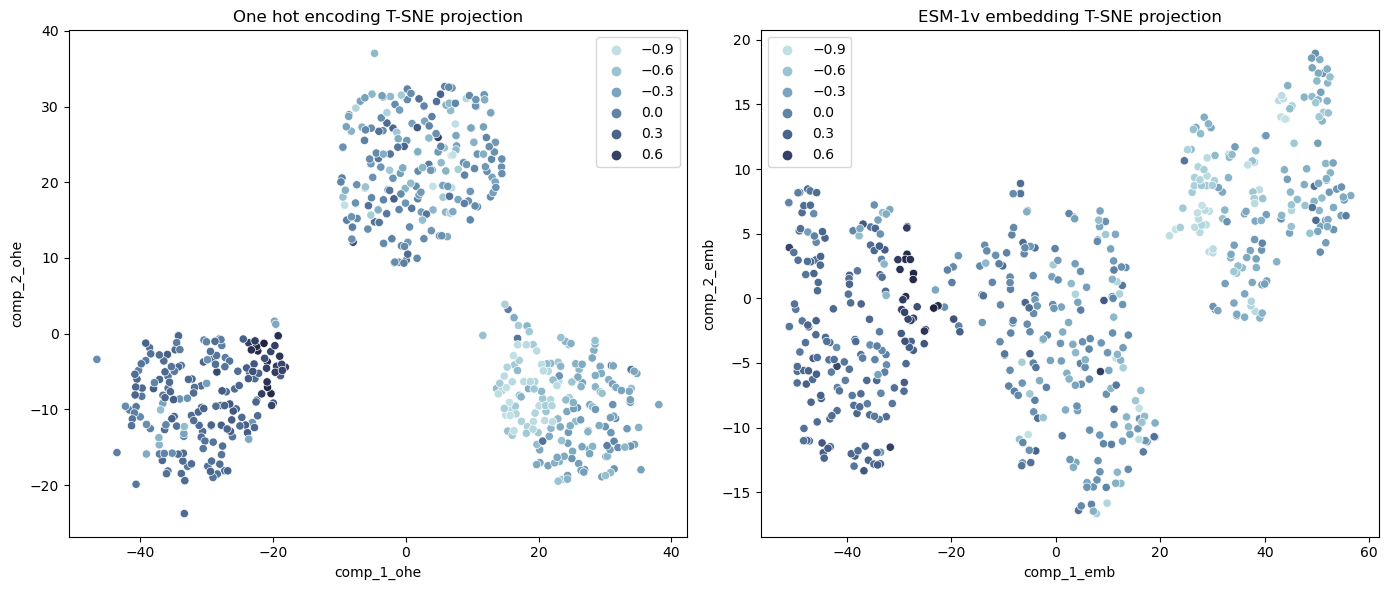

In [18]:
activities = data['Data'].to_list()
Ys = activities
y_max = max(Ys)
y_min = min(Ys)
Ys = [(x+y_min)/(y_max+y_min) for x in Ys]
data['Ys'] = Ys

Xs_ohe = torch.stack(data['ohe'].to_list(), dim=0).numpy()
Xs_emb = torch.stack(embeddings, dim=0).numpy()

tsne_ohe = TSNE(n_components=2, verbose=1, random_state=123)
z_ohe = tsne_ohe.fit_transform(Xs_ohe) 
data["comp_1_ohe"] = z_ohe[:,0]
data["comp_2_ohe"] = z_ohe[:,1]

tsne_emb = TSNE(n_components=2, verbose=1, random_state=123)
z_emb = tsne_emb.fit_transform(Xs_emb) 
data["comp_1_emb"] = z_emb[:,0]
data["comp_2_emb"] = z_emb[:,1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

# One hot encoding T-SNE projection
sns.scatterplot(x="comp_1_ohe", y="comp_2_ohe", hue=data.Data.tolist(),
                palette=cmap, data=data, ax=ax1).set(title="One hot encoding T-SNE projection")

# ESM-1v embedding T-SNE projection
sns.scatterplot(x="comp_1_emb", y="comp_2_emb", hue=data.Data.tolist(),
                palette=cmap, data=data, ax=ax2).set(title="ESM-1v embedding T-SNE projection")

plt.tight_layout()
plt.show()